In [ ]:
# The data_dir variable is the only input allowed to your code. 
# Do not modify any file names in the image directory.
data_dir = "./MASI_pets"
# Add your code in the cells.

-------------------------  ------------  ---------  ------------------  ------------------  --------------
Image Name                 Dimensions    Size (px)  Aspect Ratio        Pet Name            Owner Initials
Yasha_SR.jpg               (3456, 4608)  15925248   0.75                Yasha               SR
Ziggy_NN.jpg               (3024, 4032)  12192768   0.75                Ziggy               NN
Xiaomi_CG.jpeg             (3024, 4032)  12192768   0.75                Xiaomi              CG
Ruby and Buddy_MK.jpg      (3024, 4032)  12192768   0.75                Ruby and Buddy      MK
Mango_LC.jpg               (3024, 4032)  12192768   0.75                Mango               LC
Hamilton_CK.png            (3024, 4032)  12192768   0.75                Hamilton            CK
Francie_CK.jpg             (3024, 4032)  12192768   0.75                Francie             CK
Disney_XY.jpg              (4032, 3024)  12192768   1.3333333333333333  Disney              XY
August_XY.jpg             

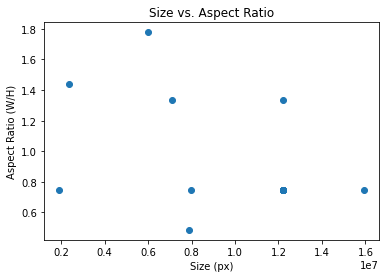

-------------------------  ------------  ---------  ------------------  ------------------  --------------
Image Name                 Dimensions    Size (px)  Aspect Ratio        Pet Name            Owner Initials
Fuzzy Pants_BL.jpg         (3264, 1836)  5992704    1.7777777777777777  Fuzzy Pants         BL
Max_BL.jpg                 (1960, 4032)  7902720    0.4861111111111111  Max                 BL
Nutmeg_BL.JPG              (3072, 2304)  7077888    1.3333333333333333  Nutmeg              BL
Oliver_CB.jpg              (2448, 3264)  7990272    0.75                Oliver              CB
Xiaomi_CG.jpeg             (3024, 4032)  12192768   0.75                Xiaomi              CG
Francie_CK.jpg             (3024, 4032)  12192768   0.75                Francie             CK
Hamilton_CK.png            (3024, 4032)  12192768   0.75                Hamilton            CK
Arthur_FR.jpg              (3024, 4032)  12192768   0.75                Arthur              FR
Nimbus_KR.jpg             

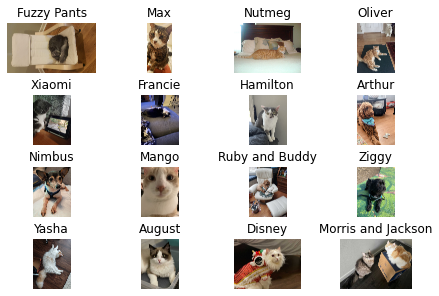

In [61]:
from pathlib import Path
from tabulate import tabulate
import numpy as np
from PIL import Image
import argparse
import matplotlib.pyplot as plt

data_dir = "./MASI_pets"

def parse_args():
    parser = argparse.ArgumentParser(description="Manipulation of pet images")

    parser.add_argument('dir', type=str, help='Path to directory or images')

    args = parser.parse_args() 
    return args

def main():
    
    table = []
    header = ["Image Name", "Dimensions", "Size (px)", "Aspect Ratio", "Pet Name", "Owner Initials"]
    
    #args = parse_args()
    #directory = Path(args.dir)
    
    for image in Path(data_dir).glob('*'):#directory.glob('*'):
        img = Image.open(image)
        name_split = image.stem.split('_')
                
        row = [image.name, img.size, img.size[0]*img.size[1], img.width/img.height, name_split[0], name_split[1]]
        table.append(row)
        table = sort_table(table)
    
    table.insert(0, header)
    print(tabulate(table))
    
    #TASK 1 COMPLETE
    
    #TASK 2
    
    x = [i[2] for i in table[1:]]
    y = [i[3] for i in table[1:]]
    
    plt.scatter(x, y)
    plt.title("Size vs. Aspect Ratio")
    plt.xlabel("Size (px)")
    plt.ylabel("Aspect Ratio (W/H)")
    plt.show()
    
    #TASK 3
    table.pop(0)
    table = sort_table_init(table)
    
    f, axarr = plt.subplots(4,4, constrained_layout=True)
    for i in range(4):
        for j in range(4):
            axarr[i,j].axis('off')
            axarr[i,j].set_title(str(table[(i*4)+j][4]))
            axarr[i,j].imshow(Image.open(data_dir+'/'+table[(i*4)+j][0]))

    table.insert(0, header)
    print(tabulate(table))
    #new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
    #new_image.paste(image1,(0,0))
    #new_image.paste(image2,(image1_size[0],0))
    
def sort_table_init(table):
    
    for i in range(len(table)):
        for j in range(i+1, len(table)):
            if table[i][5] > table[j][5]:
                table[i], table[j] = table[j], table[i]
            elif table[i][5] == table[j][5]:
                if table[i][4] > table[j][4]:
                    table[i], table[j] = table[j], table[i]
                    
    return table
    
def sort_table(table):
    if len(table) == 1:
        return table
    curr = len(table) - 1
    for i in range(len(table) - 1, -1, -1):
        if (table[curr][2] > table[i][2]):
            table[curr], table[i] = table[i], table[curr]
            curr = i
        elif (table[curr][2] == table[i][2]):
            if (table[curr][4] > table[i][4]):
                table[curr], table[i] = table[i], table[curr]
                curr = i
    return table

#- image name
#- image dimensions
#- image size (expressed via number of pixels)
#- image aspect ratio (expressed as a single floating point number) --> ratio of W/H
#- pet name
#- owner initials
#Sort the table largest to smallest by image size, breaking ties by alphabetical pet names (A - Z)

if __name__ == "__main__":
        main()

In [26]:
ii = [i for i in Path(data_dir).glob('*')]
y = Image.open(ii[0])

In [33]:
#z = np.array(y)

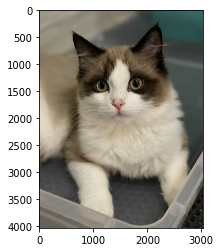

In [34]:
#plt.imshow(z)

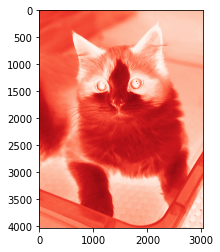

In [37]:
#plt.imshow(z[:,:,0], cmap='Reds')

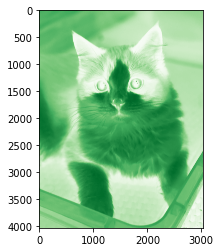

In [38]:
#plt.imshow(z[:,:,1], cmap='Greens')

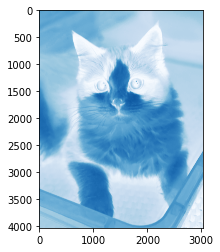

In [39]:
#plt.imshow(z[:,:,2], cmap='Blues')

(array([7.123070e+05, 9.760960e+05, 2.669768e+06, 1.825190e+06,
        1.527384e+06, 1.868773e+06, 1.460842e+06, 1.099411e+06,
        5.274300e+04, 2.540000e+02]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

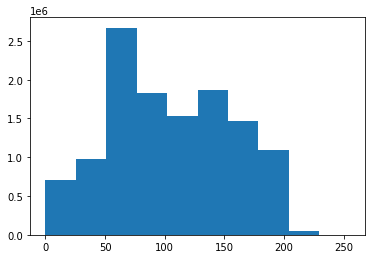

In [41]:
#plt.hist(z[:,:,2].flatten())